In [1]:
%matplotlib inline

In [2]:
from scipy import signal

In [3]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis import detect_peaks
from kid_readout.analysis.resonator import find_resonators, lmfit_resonator

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2017-02-25_232918_scan.npd/')

In [5]:
sweeps = [npd.read(name) for name in npd.node_names() if name.startswith('SweepArray')]
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [6]:
[(snap.x.ptp(), snap.y.ptp()) for snap in snaps]

[(121.0, 120.0),
 (133.0, 125.0),
 (37.0, 93.0),
 (65.0, 83.0),
 (64.0, 62.0),
 (61.0, 46.0),
 (61.0, 41.0),
 (59.0, 44.0),
 (57.0, 50.0),
 (48.0, 68.0),
 (39.0, 77.0),
 (34.0, 73.0),
 (31.0, 66.0),
 (34.0, 64.0),
 (42.0, 58.0),
 (45.0, 47.0),
 (52.0, 47.0),
 (54.0, 51.0),
 (54.0, 44.0),
 (58.0, 35.0),
 (55.0, 40.0),
 (49.0, 49.0),
 (41.0, 52.0),
 (40.0, 62.0),
 (40.0, 68.0),
 (39.0, 58.0),
 (33.0, 54.0),
 (29.0, 53.0),
 (24.0, 54.0),
 (24.0, 51.0),
 (26.0, 56.0),
 (31.0, 52.0),
 (35.0, 46.0),
 (35.0, 37.0),
 (39.0, 34.0),
 (43.0, 32.0),
 (47.0, 27.0),
 (44.0, 26.0),
 (44.0, 32.0),
 (40.0, 37.0),
 (31.0, 37.0),
 (28.0, 39.0),
 (28.0, 37.0),
 (23.0, 40.0),
 (23.0, 41.0),
 (26.0, 43.0),
 (32.0, 34.0),
 (36.0, 31.0),
 (38.0, 27.0),
 (40.0, 24.0),
 (39.0, 23.0),
 (36.0, 24.0),
 (35.0, 25.0),
 (32.0, 28.0),
 (32.0, 33.0),
 (28.0, 38.0),
 (24.0, 40.0),
 (20.0, 40.0),
 (23.0, 37.0),
 (25.0, 36.0),
 (27.0, 34.0),
 (28.0, 33.0),
 (33.0, 31.0),
 (36.0, 30.0),
 (38.0, 24.0),
 (38.0, 20.0),
 (35.0

In [7]:
def remove_background(f, s21, amp_degree=4, phi_degree=4, weights=None):
    if weights is None:
        weights = np.abs(s21)**2
    amp_poly = np.polyfit(f, np.abs(s21), deg=amp_degree, w=weights)
    phi_poly = np.polyfit(f, np.unwrap(np.angle(s21)), deg=phi_degree, w=weights)
    return s21 / (np.polyval(amp_poly, f) * np.exp(1j * np.polyval(phi_poly, f)))

# Raw data

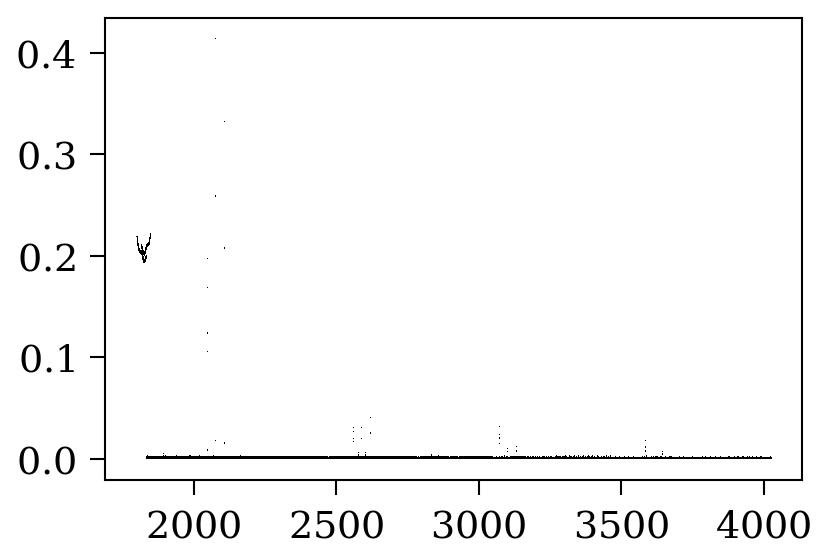

In [16]:
fig, ax = plt.subplots()
for sa in sweeps:
    ax.plot(sa.frequency_MHz, np.abs(sa.s21_point), ',k')

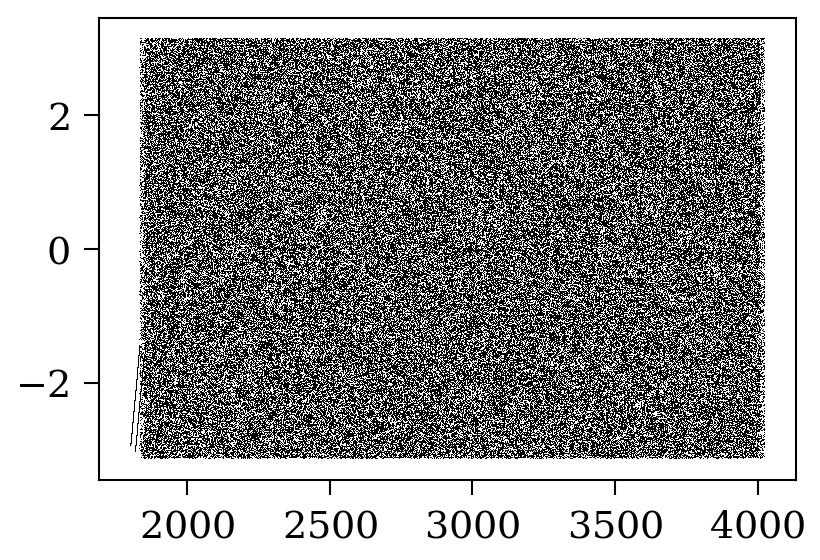

In [14]:
fig, ax = plt.subplots()
for sa in sweeps:
    ax.plot(sa.frequency_MHz, np.angle(sa.s21_point), ',k')